## <font color="#0F1518">News media in Argentina</font>

## <font color="#0F1518">1. Introduction test</font>

Most aspects of argentine society are without any doubt highly politicized. People and all sort of organizations have always been determined by its political positioning, never completely trying to hide their tendencies but instead to disguise them strategically. 
 
News media is the embodiment of this reality, and it is not very hard to identify the stand each news company takes, deepening the fractures of a society constantly polarized not only by its own decisions and thoughts, but by its context as well.    

We could apply this analysis to other geopolitical and historical realities and it would more than likely still be applicable. Political agenda is as old as human experience, but there is something as old as that: profit. One may argue that considering news media a biased industry, always aligning itself next to a political paradigm, might be at some point a bit simplistic. And perhaps this criticism, although highly hypocritical, would not be entirely false. However, the pursuit of profit is an undeniable fact.  
  
Stating that the driving force of mass media companies is to make profit is far from being an overstatement. We feel compelled to do so because from this affirmation we can derive that they are not all that interested in delivering meaningful and useful information, but in increasing the amount of consumers. Consequently, we understand that in order to accomplish that goal, its necessary to position a product that is likely to be consumed.  
  
So, in simple terms, if we consider that what news companies sell is what readers want to buy, then our main goal is to just simply analyze what type of news people are interested in. Do they see the news as a tool to enlighten themselves, to try to understand current events that at some point take direct or indirect effect in their own lives? Or they see them as just another entertainment product? Which topics raise more interest? Also, at what level is a trend exploited? In this report we will try to answer this questions as well as to throw some light on the part that news media play in argentine society.

## <font color="#0F1518">2. Methodology</font>

In [1]:
import pandas as pd
df = pd.read_csv(r"clarin\data_files\clarin_master.csv", nrows=0)
df.reset_index(drop=True, inplace=True)

The sources selected for the analysis are based on a research by Eugenia Mitchelstein and Pablo J. Boczkowski from the Center for the Study of Media and Society, Argentina (MESO), and published in the University of Oxford's Reuters Institute Digital News Report 2019 (http://www.digitalnewsreport.org/survey/2019/argentina-2019). In it they point out the following as the four most visited online news sources: Infobae, Todo Noticias/TN, Clarin and La Nación. This information is supported by a more recent study made by Comscore (https://www.totalmedios.com/nota/41753/sitios-de-noticias-digitales-infobae-fue-el-medio-mas-leido-en-marzo), which details the amount of unique visitors per site in the march of 2020: Infobae (26.539.552), Clarin (25.400.578), La Nación (20.734.990), Todo Noticias (12.687.000). To put this numbers into context, the estimated overall population is 45.367.763 (https://www.indec.gob.ar).
  
In regards to the samples used, when we first started this project our first impulse was to analyze the total amount of articles from each website. However, because they organize their articles based on their level of interest, we soon realized that the ones exposed in the home page were much more important to determine the relevance of each individual topic.  
  
The language utilized to perform all the tasks pertinent to this project was Python, and each step required the application of some of its libraries and packages:  
  
**Web data extraction**: With the help of Beautiful Soup, we parsed the home pages of each website and pulled all the URLs. Following this we identified patterns in the URLs that contained articles and created a filter. Finally, we parsed each article page in order to extract meaningful information. A slightly different approach was taken for Clarin and La Nacion. As they have the infinite scrolling feature implemented in their main sites, we had to use Selenium to simulate said feature in order to cover all the articles. Once all the URLs were extracted, we continued working with Beautiful Soup. We did this to try to standardize our programs as best as possible considering the different structures of each website. This was proven helpful for quick maintenance and control.  


**Dataframe and file creation**: All the gathered data was then loaded into a Pandas data frame according to the following schema:  

In [2]:
df

,date,topic,article_name,url,media_name,extraction_date


  
  
  * This data frame was first appended to an existing CSV master file and also a new one was generated for each specific day to work as a backup. A JSON file for the text of each article was also created, with the keys being the name of the article. Immediately after this, the program would perform a load check of the files and update a log file for control.

**Cleaning and Queries**: Once we had all the gathered data, we created a new Pandas data frame from the master CSV file. It was necessary to translate the topics, and also to reclassify certain articles in order to make it more coherent between all four news sites. We then wrote queries that would be useful for the next stage.

**Analysis and visualization**: With the assistance of Matplotlib library, we plotted figures that would help us identify significant trends and patterns.

## <font color="#0F1518">3. Data cleansing</font>

In [3]:
from datetime import datetime
import numpy as np
import json
import re
%matplotlib inline
from matplotlib.gridspec import GridSpec
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt

df_clarin = pd.read_csv(r"clarin\data_files\clarin_master.csv")
df_infobae = pd.read_csv(r"infobae\data_files\infobae_master.csv")
df_lanacion = pd.read_csv(r"lanacion\data_files\lanacion_master.csv")
df_tn = pd.read_csv(r"todonoticias\data_files\todonoticias_master.csv")
df_pieces = [df_clarin, df_tn, df_infobae, df_lanacion]
df = pd.concat(df_pieces)
df.reset_index(drop=True, inplace=True)

#Media dictionary
color_dict = {"Clarin": "#A75050", "Infobae": "#B9712D", "La Nacion": "#4C4E5F", "Todo Noticias": "#739BB3"}

#### <font color="#0F1518">3.1 Dataframe Overview</font>

In [4]:
df.head(5)

,date,topic,article_name,url,media_name,extraction_date
0,2020-05-06,sociedad,casos de coronavirus hoy en argentina: cuantos...,https://www.clarin.com/sociedad/casos-de-coron...,clarin,2020-05-06
1,2020-05-05,opinion,la encrucijada de alberto fernandez para defin...,https://www.clarin.com/opinion/encrucijada-alb...,clarin,2020-05-06
2,2020-05-06,economia,dolar blue hoy: a cuanto cotiza este miercoles...,https://www.clarin.com/economia/dolar-blue-hoy...,clarin,2020-05-06
3,2020-05-06,politica,coronavirus en argentina: tras la diferencias ...,https://www.clarin.com/politica/coronavirus-ar...,clarin,2020-05-06
4,2020-05-06,sociedad,se estrello un avion sanitario en esquel: dos ...,https://www.clarin.com/sociedad/coronavirus-ar...,clarin,2020-05-06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12858 entries, 0 to 12857
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             12858 non-null  object
 1   topic            12858 non-null  object
 2   article_name     12858 non-null  object
 3   url              12858 non-null  object
 4   media_name       12858 non-null  object
 5   extraction_date  12858 non-null  object
dtypes: object(6)
memory usage: 602.8+ KB


#### <font color="#0F1518">3.2 Default topics</font>

In [6]:
topic_list = df["topic"].unique()
topic_list

array(['sociedad', 'opinion', 'economia', 'politica', 'internacional',
       'buena-vida', 'new-york-times-international-weekly', 'deportes',
       'ciudades', 'mundo', 'brandstudio', 'cultura', 'fama',
       'policiales', 'viste', 'espectaculos', 'viajes', 'entremujeres',
       'gourmet', 'tecnologia', 'zonales', 'autos', 'viva', 'rural',
       'arq', 'revista-enie', 'salud', 'tecno', 'show', 'musica',
       'estilo', 'ultimas-noticias', 'eeuu', 'deportes-2', 'educacion',
       'coronavirus', 'tendencias-america', 'infoshow',
       'the-new-york-times', 'entretenimiento', 'futbol-europeo',
       'america', 'teleshow', 'inhouse', 'mexico', 'america-latina',
       'historias', 'fotos', 'wapo', 'tendencias', 'historia-america',
       'venezuela', 'ciencia-america', 'grandes-libros', 'desarrollo',
       'campo', 'ciencia', 'colombia', 'innovacion', 'def-medio-ambiente',
       'defensa-y-seguridad', 'gaming', 'talento-y-liderazgo', 'turismo',
       'documentales', 'aquellos-q

#### <font color="#0F1518">3.3 Remove irrelevant topics and rows with missing values</font>

In [7]:
df.drop(df[(df["topic"]=="fotos") | (df["topic"]=="brandstudio")].index, inplace=True)
df.dropna(inplace=True)

Topic "fotos" was dropped as it contains only photos. "Brand studio" is a commercial branch from Clarin and has strictly marketing purposes and they have no use for this project.

**<font color="#0F1518">3.4 Change date values to type datetime</font>**

In [8]:
df["extraction_date"] = df["extraction_date"].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d"))
df["extraction_date"] = df["extraction_date"].dt.date

#### <font color="#0F1518">3.5 Create covid-19 column</font>

In [9]:
df["covid_in_article"] = None
for name in df["media_name"].unique():
    for d in list(df["extraction_date"].unique()):
        json_path = fr"{name}\data_files\{name}-articles-{d}.json"
        with open(json_path, "r") as json_file:
            loaded_json = json.load(json_file)
            for key, value in loaded_json.items():
                match = re.search(r"coronavirus|covid|cuarentena", value, flags=re.IGNORECASE)
                if match:
                    df.loc[(df["media_name"]==name)&(df["article_name"]==key), "covid_in_article"] = True
                else:
                    df.loc[(df["media_name"]==name)&(df["article_name"]==key), "covid_in_article"] = False

#### <font color="#0F1518">3.6 Topic translation and media_name capitalization</font>

In [10]:
translated_topics = {"sociedad": "Society", "opinion": "Opinion", "economia": "Economy", "politica": "Politics", "internacional": "International", "buena-vida": "Lifestyle", "new-york-times-international-weekly": "International", "deportes": "Sports", "ciudades": "Society", "mundo": "International", "cultura": "Culture", "fama": "Entertainment", "policiales": "Crime", "viste": "Others", "espectaculos": "Entertainment", "viajes": "Tourism", "entremujeres": "Lifestyle", "gourmet": "Lifestyle", "tecnologia": "Technology", "zonales": "Society", "autos": "Cars", "viva": "Society", "rural": "Economy", "arq": "Others", "revista-enie": "Culture", "salud": "Lifestyle", "tecno": "Technology", "show": "Entertainment", "musica": "Entertainment", "estilo": "Entertainment", "eeuu": "International", "deportes-2": "Sports", "educacion": "Society", "coronavirus": "Coronavirus", "tendencias-america": "Others", "infoshow": "Entertainment", "the-new-york-times": "International", "entretenimiento": "Entertainment", "futbol-europeo": "Sports", "america": "International", "teleshow": "Entertainment", "inhouse": "Lifestyle", "mexico": "International", "america-latina": "International", "historias": "Culture", "wapo": "Others", "tendencias":  "Lifestyle", "historia-america": "Culture", "venezuela": "International", "ciencia-america": "Science", "grandes-libros": "Culture", "desarrollo": "Others", "campo": "Economy", "ciencia": "Science", "colombia": "International", "innovacion": "Technology", "def-medio-ambiente": "Environment", "defensa-y-seguridad": "Others", "gaming": "Entertainment", "talento-y-liderazgo": "Others", "turismo": "Tourism", "el-mundo": "International", "lifestyle": "Lifestyle", "editoriales": "Opinion", "seguridad": "Crime", "buenos-aires": "Others", "propiedades": "Society", "moda-y-belleza": "Lifestyle", "comunidad": "Society", "documentales": "Others", "aquellos-que-hemos-perdido": "Others", "rugby": "Sports", "ultimas-noticias": "Others"}
df["topic"] = df["topic"].apply(lambda x: translated_topics[x])
df["media_name"].replace(list(df["media_name"].unique()), ["Clarin", "Todo Noticias", "Infobae", "La Nacion"], inplace=True)

For practical purposes, several topics have been translated and grouped acording to the articles content:
 * "society" contains: educacion (education), sociedad (society), propiedades (estate), comunidad (comunity), ciudades (cities), zonales (zonal), "viva".
 * "economy" contains: economia (economy), campo (agriculture), rural.
 * "politics" replaced politica.
 * "cars" replaced autos.
 * "coronavirus" remained the same.
 * "entertainment" contains: show, musica (music), estilo (style), infoshow, entretenimiento (entertainment), teleshow, gaming, espectaculos (shows), fama (fame).
 * "international" contains: internacional (international), eeuu, mundo (world), the-new-york-times, america, mexico, america-latina, venezuela, colombia, el-mundo (the-world), new-york-times-international-weekly.
 * "sports" contains: deportes (sports), deportes-2, futbol-europeo (football-european), rugby. 
 * "technology" contains: techno, innovacion (innovation), tecnologia (technology).
 * "lifestyle" contains: salud (health), inhouse, tendencias (trends), lifestyle, moda-y-belleza (fashion-and-beauty), buena-vida (good-life), entre-mujeres (between-women), gourmet.
 * "crime" contains: policiales (police), seguridad (safety).
 * "opinion" contains: opinion, editoriales (editorials).
 * "culture" contains: cultura (culture), historias (stories), historia-america (history-america), grandes-libros (great-books), "revista-enie".
 * "science" contains: ciencia-america (science-america), ciencia (science).
 * "tourism" contains: turismo (tourism), viajes (trips).
 * "environment" replaced def-medio-ambiente (def-enviroment).
 * "others" contains: tendencias-america (trends-america), "wapo", desarrollo (development), defensa-y-seguridad (defense-and-safety), buenos-aires, "viste", "arq", talento-y-liderazo (talent-and-leadership), documentales (documentaries), aquellos-que-hemos-perdido (those-who-we-lost), "ultimas-noticias"

 

#### <font color="#0F1518">3.7 Dataframe overview</font>

In [11]:
df.head(5)

,date,topic,article_name,url,media_name,extraction_date,covid_in_article
0,2020-05-06,Society,casos de coronavirus hoy en argentina: cuantos...,https://www.clarin.com/sociedad/casos-de-coron...,Clarin,2020-05-06,True
1,2020-05-05,Opinion,la encrucijada de alberto fernandez para defin...,https://www.clarin.com/opinion/encrucijada-alb...,Clarin,2020-05-06,True
2,2020-05-06,Economy,dolar blue hoy: a cuanto cotiza este miercoles...,https://www.clarin.com/economia/dolar-blue-hoy...,Clarin,2020-05-06,False
3,2020-05-06,Politics,coronavirus en argentina: tras la diferencias ...,https://www.clarin.com/politica/coronavirus-ar...,Clarin,2020-05-06,True
4,2020-05-06,Society,se estrello un avion sanitario en esquel: dos ...,https://www.clarin.com/sociedad/coronavirus-ar...,Clarin,2020-05-06,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12857
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              12811 non-null  object
 1   topic             12811 non-null  object
 2   article_name      12811 non-null  object
 3   url               12811 non-null  object
 4   media_name        12811 non-null  object
 5   extraction_date   12811 non-null  object
 6   covid_in_article  12805 non-null  object
dtypes: object(7)
memory usage: 800.7+ KB


## <font color="#0F1518">4. Analytics</font>

In [13]:
plt.style.use("seaborn")
#DATE LABELS LIST
date_labels = [pd.to_datetime(date).strftime("%m-%d") for date in list(df["extraction_date"].unique())]
#DATES LIST
dates = list(df["extraction_date"].unique())
#COLORS
color_dict = {"Clarin": "#B48686", "Infobae": "#E19F3F", "La Nacion": "#6D6D75", "Todo Noticias": "#88B9AA"}
default_colors = [color_dict[key] for key in color_dict]
#MEDIA NAMES
media_names = sorted(list(df["media_name"].unique()))

def tick_spacer(interval):
    spaced_ticks = []
    for n, date in enumerate(date_labels):
        if n%interval==0:
            spaced_ticks.append(date)
        else:
            spaced_ticks.append("")
    return spaced_ticks

class Plotter:
    def __init__(self, query, title):
        self.query = query
        self.title = title
        
    def line_plotter(self, default_colors=None):
        ax.set_prop_cycle('color', default_colors)
        ax.plot(self.query, linewidth=3)
        ax.set_xticks(dates), ax.set_xticklabels(date_labels)
        ax.set_facecolor("#D5D8DC")
        ax.set_title(self.title, position=[.5, 1.05], fontsize=12)
        ax.legend(media_names, bbox_to_anchor=(0.5,1.09), loc="upper center", ncol=4) 
        
    def box_plotter(self):
        sns.boxplot(self.query.iloc[:, 1], self.query.iloc[:, 2], data=self.query, linewidth=2.5).set(xlabel="", ylabel="")
        idx = 0
        for name in media_names:
            box = ax.artists[idx]
            box.set_facecolor(default_colors[idx])
            idx += 1
        ax.set_facecolor("#D5D8DC")
            
    def bar_plotter(self, color):
        ax.bar(list(self.query.index), self.query.to_list(), color=color, width=0.40)
        ax.set_title(self.title)
        for i in range(len(self.query)):
            ax.text(self.query.index[i], self.query[i]+20, f"{round((self.query[i]*100)/self.query.sum(), 2)}%",horizontalalignment="center")
        ax.set_facecolor("#D5D8DC")
        
    def bar_plotter_stack(self, color):
        x, y = list(self.query[0].index), self.query[0].to_list()
        x1, y1 = list(self.query[1].index), self.query[1].to_list()
        ax.bar(x, y, color=color[0], width=0.40)
        ax.bar(x1, y1, color=color[1], width=0.30)
        ax.set_title(self.title, fontsize=12)
        yticks = ax.get_yticks()
        yticks_list = list(yticks) + [(yticks[-1]) + (yticks[-1]) - (yticks[-2])]
        ax.set_yticks(yticks_list)
        percent_value = round(self.query[1].sum()/self.query[0].sum()*100, 1)        
        ax.legend([f"Articles total: {self.query[0].sum()}",  f"Covid-19 total: {self.query[1].sum()} ({percent_value}%)"])
        for i in range(len(x1)):
            ax.text(x1[i], y1[i]+(((yticks[-1])-(yticks[-2]))/3), f"{round((y1[i]*100)/y[i], 2)}%",horizontalalignment="center", color="#641E16")
        ax.set_facecolor("#D5D8DC")
        
    def barh_plotter(self, color):
        ax.barh(self.query.index, self.query.to_list(), color=color)
        ax.set_title(self.title, fontsize=12)
        ax.set_ylabel("")
        labels = [topic for topic in self.query.sort_values(ascending=False).head().index.to_list()]
        patches = [mpatches.Patch(color=color) for i in labels]
        plt.legend(patches, labels, title="Top 5 topics", loc="lower right")
        ax.set_facecolor("#D5D8DC")
        return ax

#### <font color="#0F1518">4.1 Samples</font>

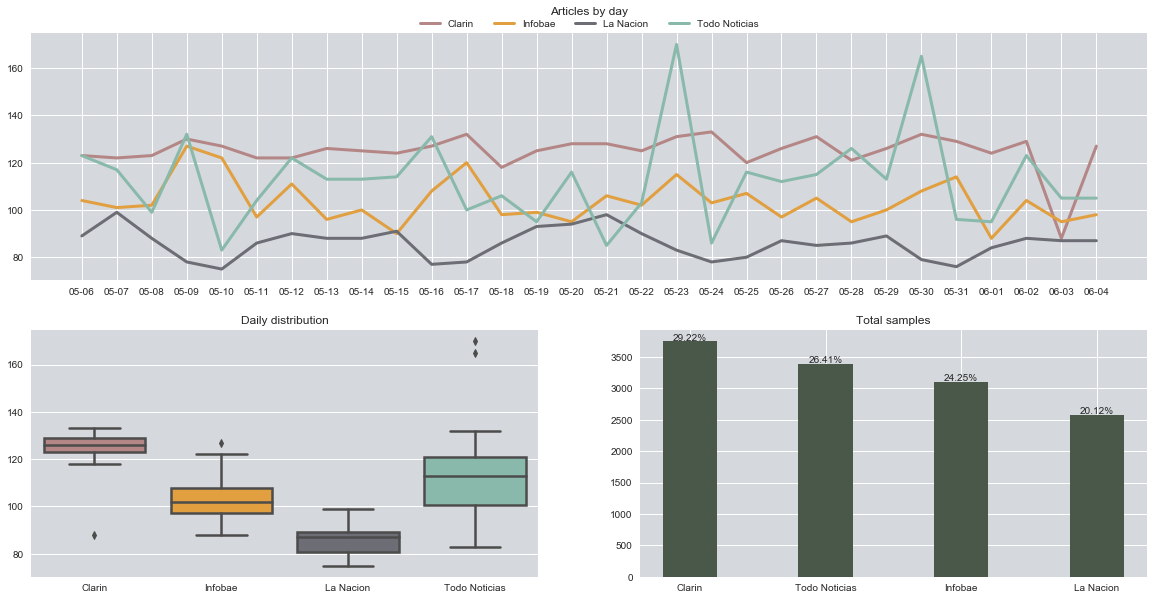

In [24]:
###FIGURE-A
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(2, 2)

#QUERIES
values_bymedia = df.groupby(["media_name"])["article_name"].count().sort_values(ascending=False)
values_bydate_bymedia = df.groupby(["extraction_date", "media_name"]).agg({"article_name":"count"})
mean_total = int(np.average(values_bydate_bymedia["article_name"].values))
sd = [name + ": " + str(round(np.std(values_bydate_bymedia.reset_index().sort_values(by="article_name").groupby("media_name").get_group(name)["article_name"].values), 1)) for name in media_names]

####LINE PLOT####
ax = fig.add_subplot(gs[0, :2])
articles_bydate1 = Plotter(values_bydate_bymedia.unstack(), "Articles by day")
articles_bydate1.line_plotter(default_colors)

####BOX PLOT####
ax = fig.add_subplot(gs[1, 0])
articles_bydate2 = Plotter(values_bydate_bymedia.reset_index(), "Daily articles total distribution")
articles_bydate2.box_plotter()
ax.set_title("Daily distribution", fontsize=12)

####BAR PLOT####
ax = fig.add_subplot(gs[1, 1])
articles_total = Plotter(values_bymedia, "Total samples")
articles_total.bar_plotter("#4A584A")

plt.show()

The total amount beetween all four datasets add up to {{df.shape[0]}} articles, distribuited throughout {{df["extraction_date"].nunique()}} days. Any duplicates have been filtered in the scraping process. There were articles that remained on the home page for one or more days, and they are being counted as new articles as they have relative value. They represent a {{round(len(df[df.duplicated(["article_name"])==True])/df.shape[0]*100, 2)}}% of the dataset.

Despite some exceptional behaviors, the amount of extracted and filtered samples have been relatively consistent throughout the accounted period, giving a daily mean of {{mean_total}} articles. As seen in the plot graph, every dataset has falls and rises, but in the cases of Clarin and La Nacion they are more restrained. On the other hand, both of this sites are rather contradictory in their distribution over the week, with Clarin values going up and La Nacion values going down on weekends. Infobae and Todo Noticias proved to be irregular as well, altough to a higher extent. This contrast is stronger with Todo Noticias, reaching its maximum peaks on Saturdays. In terms of standard deviation, the values are the following: {{sd[0]}}, {{sd[1]}}, {{sd[2]}} and {{sd[3]}}.

The standard deviation of Todo Noticias set is explained partially because of the presence of some outliers, which are the result, as explained before, of unusual increase in the amount of articles published rather than an error in the web scraping programs. Without these, the values would decrease to {{round(np.std(values_bydate_bymedia.reset_index().sort_values(by="article_name").groupby("media_name").get_group("Todo Noticias")["article_name"].values[:-2]), 1)}}. 


#### <font color="#0F1518">4.2 Topics</font>

#### <font color="#0F1518">4.2.1 Topics general</font>

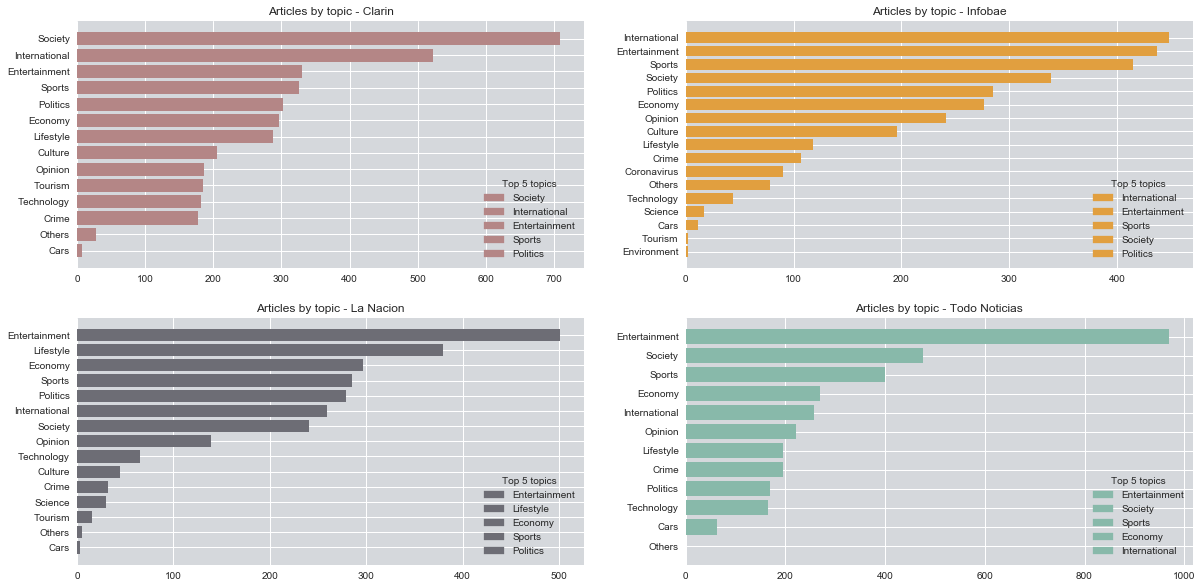

In [23]:
###FIGURE-B
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(2, 2)  

#QUERIES         
total_bymedia_bytopic = df.groupby(["media_name", "topic"]).agg({"article_name":"count"}).reset_index(level="topic").rename(columns={"article_name":"topic_totals"})
df_bytopic_merged = pd.merge(left=total_bymedia_bytopic, right=values_bymedia, how="inner", on="media_name").rename(columns={"article_name":"media_totals"})
df_bytopic_merged["topic_percent"] = round((df_bytopic_merged["topic_totals"] / df_bytopic_merged["media_totals"])*100, 2)
total_perc_bytopic = df_bytopic_merged.drop(columns="media_totals").reset_index()
df_ex = lambda x, y: total_perc_bytopic.groupby(["media_name", "topic"]).get_group((x, y))[["topic_totals", "topic_percent"]].values[0][1]

####BARH PLOT####
idx  = 0
for name in media_names:
    total_bytopic = df.loc[df["media_name"]==name]["topic"].value_counts().sort_values()
    ax = fig.add_subplot(gs[idx])
    p_topic = Plotter(total_bytopic, f"Articles by topic - {name}")
    p_topic.barh_plotter(color_dict[name])
    idx += 1
    
plt.show()

When analyzing the main topics, some websites show a more accentuated focus than others. Todo Noticias has a very clear orientation towards Entertainment, with {{df_ex("Todo Noticias", "Entertainment")}}% of its articles being about this topic. La Nacion ({{df_ex("La Nacion", "Entertainment")}}%) have Entertainment has its main topic too. Infobae ({{df_ex("Infobae", "Entertainment")}}%) does the same, altough in a lesser degree, having it as it second most important. Finaly Clarin, despite seemingly prioritizing other subjects, has Entertainment ocupying the 4th place in level of importance with a {{df_ex("Clarin", "Entertainment")}}%. 

Another one agglomerate a fair portion of the total of articles is Society. Clarin ranks it in the first place with {{df_ex("Clarin", "Society")}}%, followed by Todo Noticias ({{df_ex("Todo Noticias", "Society")}}%), Infobae ({{df_ex("Infobae", "Society")}}%) and La Nacion ({{df_ex("La Nacion", "Society")}}%). 

Sport seems to be regarded similarly by all four sites, taking the third place in three of them (Infobae [{{df_ex("Infobae", "Sports")}}%], La Nacion [{{df_ex("La Nacion", "Sports")}}%], Clarin [{{df_ex("Clarin", "Sports")}}%]), and the fourth in Todo Noticias ({{df_ex("Todo Noticias", "Sports")}}%). The same criteria match is observed in Opinion, taking {{df_ex("Infobae", "Opinion")}}% of the Infobae articles. In a similar venue is Clarin with {{df_ex("Clarin", "Opinion")}}%, La Nacion with {{df_ex("La Nacion", "Opinion")}}% and Todo Noticias with {{df_ex("Todo Noticias", "Opinion")}}%.

International news have a more prominent place in Infobae ({{df_ex("Infobae", "International")}}%) and Clarin ({{df_ex("Clarin", "International")}}%), but those percentages diminish with La Nacion ({{df_ex("La Nacion", "International")}}%) and even more with Todo Noticias ({{df_ex("Todo Noticias", "International")}}%)

Economy and Politics have the particularity of being somewhat close to each other in terms of relative importance, which is demonstrated by these values: {{df_ex("La Nacion", "Economy")}}% (La Nacion), {{df_ex("Infobae", "Economy")}}% (Infobae), {{df_ex("Clarin", "Economy")}}% (Clarin) and {{df_ex("Todo Noticias", "Economy")}}% (Todo Noticias) for Economy, and {{df_ex("La Nacion", "Politics")}}% (La Nacion), {{df_ex("Infobae", "Politics")}}% (Infobae), {{df_ex("Clarin", "Politics")}}% (Clarin) and {{df_ex("Todo Noticias", "Politics")}}% (Todo Noticias) for Politics.

It is also necessary to mention that Lifestyle is the second topic with more articles in La Nacion with a {{df_ex("La Nacion", "Lifestyle")}}%, but its importance is not such in the other three (Clarin with {{df_ex("Clarin", "Lifestyle")}}%, Todo Noticias with {{df_ex("Todo Noticias", "Lifestyle")}}% and Infobae with {{df_ex("Infobae", "Lifestyle")}}%). 

All 4 news sites reach more concensus with their less important. Cars (Todo Noticias: {{df_ex("Todo Noticias", "Cars")}}%, Infobae: {{df_ex("Infobae", "Cars")}}%, Clarin: {{df_ex("Clarin", "Cars")}}%, La Nacion: {{df_ex("La Nacion", "Cars")}}%), Technology (Todo Noticias: {{df_ex("Todo Noticias", "Technology")}}%, Infobae: {{df_ex("Infobae", "Technology")}}%, Clarin: {{df_ex("Clarin", "Technology")}}%, La Nacion: {{df_ex("La Nacion", "Technology")}}%), Crime (Todo Noticias: {{df_ex("Todo Noticias", "Crime")}}%, Infobae: {{df_ex("Infobae", "Crime")}}%, Clarin: {{df_ex("Clarin", "Crime")}}%, La Nacion: {{df_ex("La Nacion", "Crime")}}%). Environment is only present in Infobae with a very low percent {{df_ex("Infobae", "Environment")}}%. A similiar path follows Science, only shared by La Nacion ({{df_ex("La Nacion", "Science")}}%) and Infobae ({{df_ex("Infobae", "Science")}}%). Tourism owns a fair share of articles in Clarin ({{df_ex("Clarin", "Tourism")}}%), droping to a {{df_ex("La Nacion", "Tourism")}}% in La Nacion, and being nonexistent in the other two. Culture, absent in Todo Noticias, shows in Clarin ({{df_ex("Clarin", "Culture")}}%), Infobae ({{df_ex("Infobae", "Culture")}}%) and La Nacion ({{df_ex("La Nacion", "Culture")}}%).



**<font color="#0F1518">4.3 Covid-19</font>**

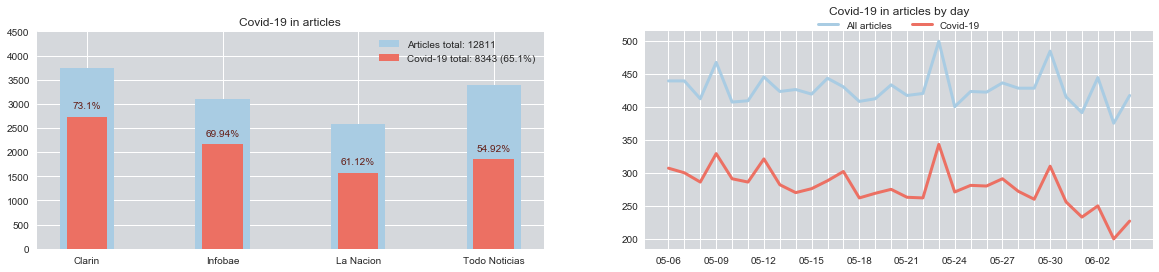

In [22]:
###FIGURE-C
fig = plt.figure(figsize=(20, 4))
gs = GridSpec(1, 2)

#QUERIES
df_covid_total = df.loc[(df["article_name"].str.contains("coronavirus|cuarentena|covid"))|(df["covid_in_article"]==True)]
covid_bytopic = df_covid_total.groupby(["media_name", "topic"]).agg({"article_name":"count"}).rename(columns={"article_name":"covid_totals"})
ttl_cvd_bm_bt = pd.merge(total_bymedia_bytopic.reset_index(), covid_bytopic, on=("media_name", "topic"))
ttl_cvd_bm = ttl_cvd_bm_bt.groupby("media_name")[["topic_totals", "covid_totals"]].sum()
ttl_cvd_bm["%"] = round((ttl_cvd_bm["covid_totals"] / ttl_cvd_bm["topic_totals"])*100, 2) 
cvd_perc_over_ttl = round((ttl_cvd_bm["covid_totals"].sum() / ttl_cvd_bm["topic_totals"].sum())*100, 2)

df_covid_bydate = df_covid_total.groupby("extraction_date").agg({"article_name":"count"})
df_bydate = df.groupby("extraction_date").agg({"article_name":"count"})

####BAR STACKED PLOT####
ax = fig.add_subplot(gs[0])
corona = Plotter([ttl_cvd_bm["topic_totals"], ttl_cvd_bm["covid_totals"]], "Covid-19 in articles")
corona.bar_plotter_stack(["#A9CCE3", "#EC7063"])

####LINE PLOT####
ax = fig.add_subplot(gs[1])
covid_bydate = Plotter(df_bydate, "Covid-19 in articles by day")
covid_bydate.line_plotter("#A9CCE3")
ax.plot(df_covid_bydate, color="#EC7063", linewidth=3)
ax.legend(["All articles", "Covid-19"], bbox_to_anchor=(0.5,1.09), loc="upper center", ncol=4) 
ax.set_xticklabels(tick_spacer(3))

plt.subplots_adjust(hspace=0.4)
plt.show()

In this section we try to determine the impact of Covid-19 in the news industry, exemplified with our 4 sites of study. The classification of the articles was independent from the topic itself, and it relied on the match of three words: "Covid-19", "Coronavirus" and "quarantine". This match could take place either in the article content or on its title  ([Appendix - B](#appendix_b)), but for practical purposes we will not consider both criterias as mutually exclusive.

From a first look, we observe that {{ttl_cvd_bm["covid_totals"].sum()}} from a total of {{ttl_cvd_bm["topic_totals"].sum()}} articles contains at least one reference to the selected keywords. In other words, we can say that a {{cvd_perc_over_ttl}}% of all the articles sampled have this characteristic. We can also see that whenever the amount of articles published increases or decreases, the amount that mention Covid-19 does so in a very similar pattern. 

In regards to each separate site, Clarin references Covid-19 in {{ttl_cvd_bm.iloc[0]["%"]}}% of its articles. This percentage in Infobae's, Todo Noticias's and La Nacion's sites is of {{ttl_cvd_bm.iloc[1]["%"]}}%, {{ttl_cvd_bm.iloc[3]["%"]}}% and {{ttl_cvd_bm.iloc[2]["%"]}}% respectively.

**<font color="#0F1518">4.3.1 Covid-19 by topic</font>**

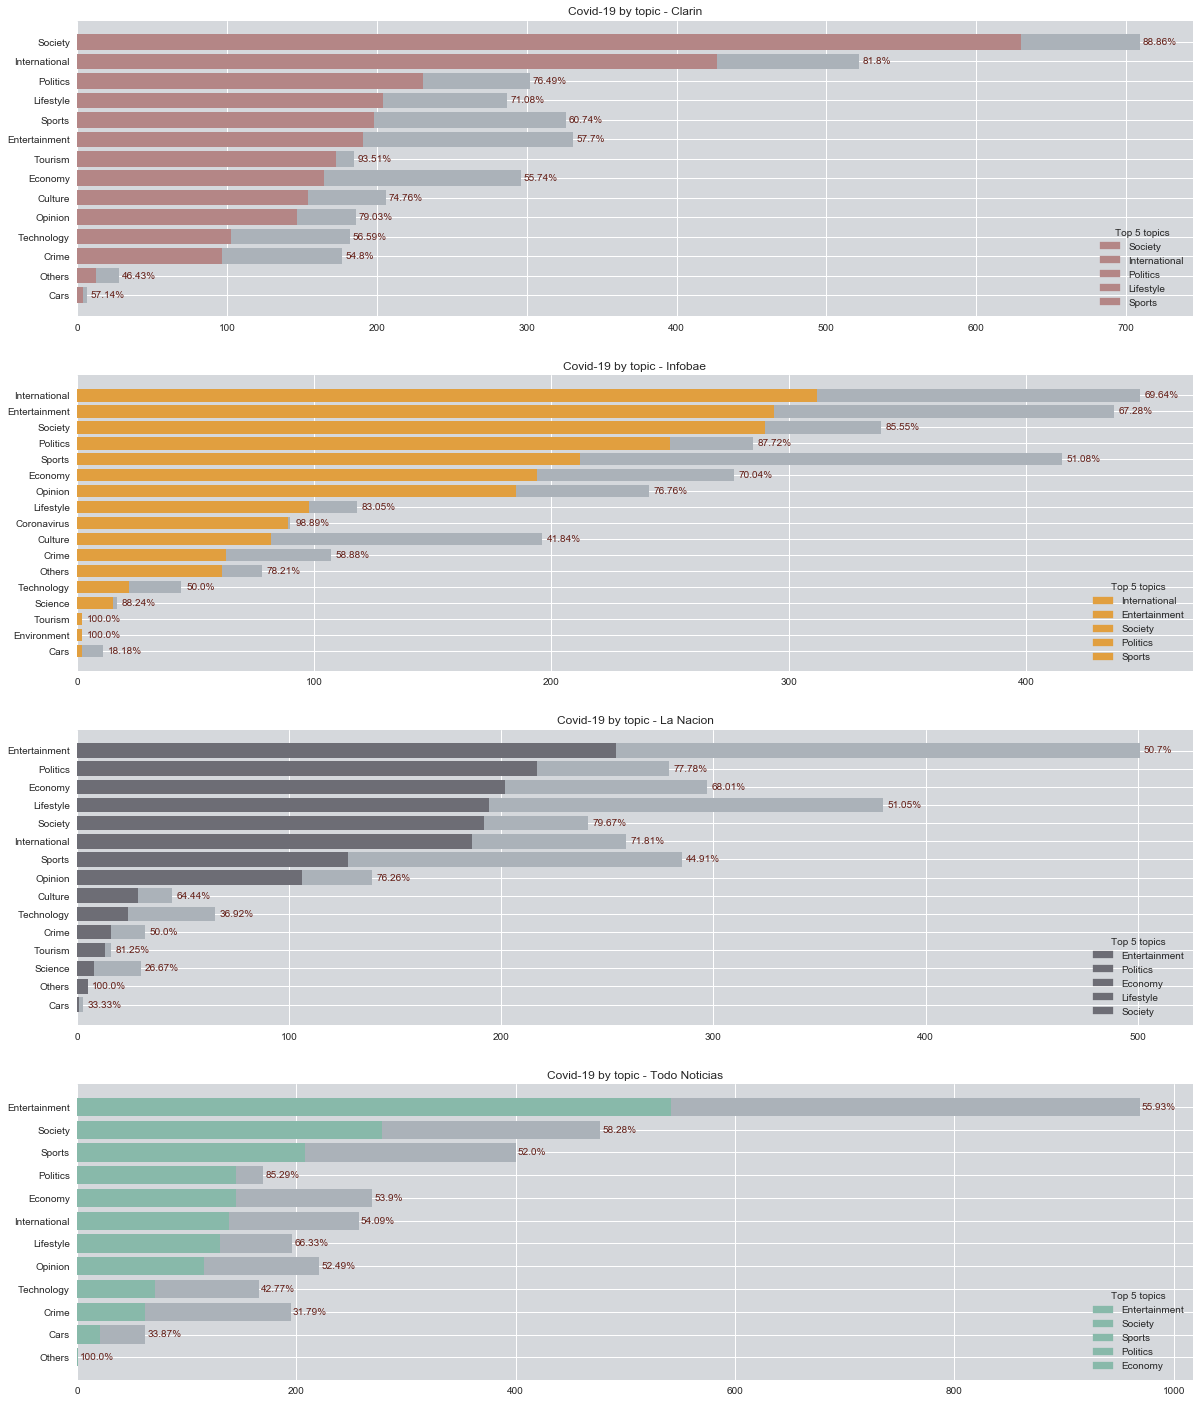

In [21]:
## FIGURE-D
fig = plt.figure(figsize=(20, 25))
gs = GridSpec(4, 1)  

###QUERIES
ttl_cvd_bt = ttl_cvd_bm_bt.groupby("topic")[["topic_totals", "covid_totals"]].sum()
ttl_cvd_bt["%"] = round((ttl_cvd_bt["covid_totals"] / ttl_cvd_bt["topic_totals"])*100, 2) 
ttl_cvd_bm_bt["%"] = round((ttl_cvd_bm_bt["covid_totals"] / ttl_cvd_bm_bt["topic_totals"])*100, 2) 
def get_ttl_cvd_pct(media, topic):
    values = ttl_cvd_bm_bt.groupby("media_name").get_group(media).loc[ttl_cvd_bm_bt["topic"]==topic]
    return values["topic_totals"].item(), values["covid_totals"].item(), values["%"].item()
top10_cvd = ttl_cvd_bm_bt.loc[ttl_cvd_bm_bt["topic_totals"]>100].sort_values(by="%", ascending=False).iloc[0:10]
top_s = ""
top_lst = [f"{t} ({m}): {p}%" for m, t, p in top10_cvd[["media_name", "topic", "%"]].values]
for s in top_lst:
    top_s += s + ". "
bottm_s = ""
bottm10_cvd = ttl_cvd_bm_bt.loc[ttl_cvd_bm_bt["topic_totals"]>100].sort_values(by="%").iloc[0:10]
bottm_lst = [f"{t} ({m}): {p}%" for m, t, p in bottm10_cvd[["media_name", "topic", "%"]].values]
for s in bottm_lst:
    bottm_s += s + ". "

####BARH PLOT####
idx  = 0
for name in media_names:
    ttl_cvd_xt = ttl_cvd_bm_bt.groupby("media_name").get_group(name).drop(columns=["media_name"]).set_index(["topic"]).sort_values(by="covid_totals")
    ax = fig.add_subplot(gs[idx])
    p_topic = Plotter(ttl_cvd_xt["topic_totals"], "OVERRIDDEN")
    p_topic.barh_plotter("#ABB2B9")
    c_topic = Plotter(ttl_cvd_xt["covid_totals"], f"Covid-19 by topic - {name}")
    c_topic.barh_plotter(color_dict[name])
    idx += 1      
    for i in range(len(ttl_cvd_xt)):
        x, y  = list(ttl_cvd_xt["topic_totals"].index), ttl_cvd_xt["topic_totals"].to_list()
        x1, y1 = list(ttl_cvd_xt["covid_totals"].index), ttl_cvd_xt["covid_totals"].to_list()
        ax.text(y[i]+2, x[i], f"{round((y1[i]*100)/y[i], 2)}%", verticalalignment="center", color="#641E16")

plt.show()

Right above, when can appreciate the presence of Covid-19 across each website. This presence appears to be proportional at some extent to the amount of articles per topic in most cases. However, there are some exceptions.

We can detect cases where the amount of references to Covid-19 are above the established average considering the 4 sites of study. One example is Society, with a {{ttl_cvd_bt["%"]["Society"]}}%. This a {{round(ttl_cvd_bt["%"]["Society"]-cvd_perc_over_ttl, 2)}}% more than the percentage over the total articles ({{cvd_perc_over_ttl}}%). Tourism ({{ttl_cvd_bt["%"]["Tourism"]}}%), Politics ({{ttl_cvd_bt["%"]["Politics"]}}%) and International ({{ttl_cvd_bt["%"]["International"]}}%) are clear examples as well.

In the opposite direction, there are some areas that have a lower quantity of articles with Covid-19 allusions. Examples of this are Entertainment ({{ttl_cvd_bt["%"]["Entertainment"]}}%), Culture ({{ttl_cvd_bt["%"]["Culture"]}}%), Sports ({{ttl_cvd_bt["%"]["Sports"]}}%), Technology ({{ttl_cvd_bt["%"]["Technology"]}}%) and Science ({{ttl_cvd_bt["%"]["Science"]}}%).

Overall, we could determine that, considering only the cases where the amount surpasses 100 articles, the top 10 topics and sites with the highest percentage of Covid-19 presence are: {{top_s}}

Conversely, the 10 with lowest percentage are: {{bottm_s}}

## <font color="#0F1518">Conclusion</font>

As we stated in the introduction, one of the main objectives of this project was to determine what type of news do people in general consume. We believe that at least a fairly decent approximation has been done, but it was not without challenges. Getting a stable amount of samples proved to be difficult in several occasions, and initially there were some worries because of it, especially with Todo Noticias. But we soon realized that the most drastic peaks and subsequent falls happened mostly with Entertainment news, and precisely on Saturdays. Infobae showed some inconsistencies as well, but in a shorter degree. Fortunately, the remaining two sites were more stable.

The analyzed websites evidenced tendencies in different levels. There is little doubt that the main focus of Todo Noticias is Entertainment.  We could say the same about La Nacion, although this site shows a wider distribution in a very modest fashion. The 6 topics that follow Entertainment have a similar share of articles between each other. Arguably, the most varied site is Infobae, which shows the widest distribution. We see that International, Entertainment and Sport with similar percentages. Lastly, Clarin appears somehow different from the rest. In this case, the topic with greatest amount of articles is Society, with Entertainment being displaced to a 4th position. 
In regards their level of importance, we could mention eight: Society, International, Sports, Entertainment, Politics, Economy and Lifestyle. Of this, Entertainment is the one with the highest total of articles, which might or might not be an indicator of current argentine society in general terms. 

Since the conformation of Argentina as an independent nation, and with some exceptional periods, political, economic and social unrest have dominated the reality of the country. This situation only seems to be prolonged by the inability to break an established loop of inefficient governments and overall corruption. Perhaps it should not surprise then that more people are interested in entertainment than in politics or economy, two topics that occupy the middle part of the percentage rankings. Culture, Science and Technology appear to be even less important. Having stated this, we are extremely reticent to indicate a even a correlation between the situation of the country and the interests of people, but at least it might be interesting to start considering it. After all, is a well-known fact that education is a key pillar in a nation prosperity, and even if they clearly show no interest in doing so, news media play an educational role.  

Despite this discreet educational role, and as we affirmed in the beginning of this project, news media has a more material reason of being. By no means this is any sort of criticism, but keeping this in mind might help explaining the preponderance of some topics over others. For example, it could at some extent justify Covid-19 being present across all kinds of articles. We are more than aware that this a very delicate theme, as it has infiltrated and shaped all aspects of society. But we cannot help to notice a light contradiction: ({{ttl_cvd_bt["%"]["Politics"]}})% of the Politics articles mentions Covid-19, and this makes sense at some point, but this value drops to ({{ttl_cvd_bt["%"]["Economy"]}})% in Economy. And we can appreciate this tendency in all four websites. It is at least curious that in a country with deep economic issues, in a country that is already in technical default and that has an ongoing quarantine for over two months already, the mentions of Covid-19 in Economy share similar levels with other topics such as Entertainment ({{ttl_cvd_bt["%"]["Entertainment"]}}%).  

To finalize this paper, we must say that we could not achieve the desired precision in our analysis, as the topics in several cases were ambiguously assigned by those responsible for the sites. And altough we made sure to reassign them in the most sensible way, we still feel there is room for improvement. For future analysis we would like to implement machine learning algorithms for keyword extraction as, even though we might achieve the same results in general terms, they wlll probably help to polish the analysis.  

### <font color="#0F1518">Appendix - A</font>

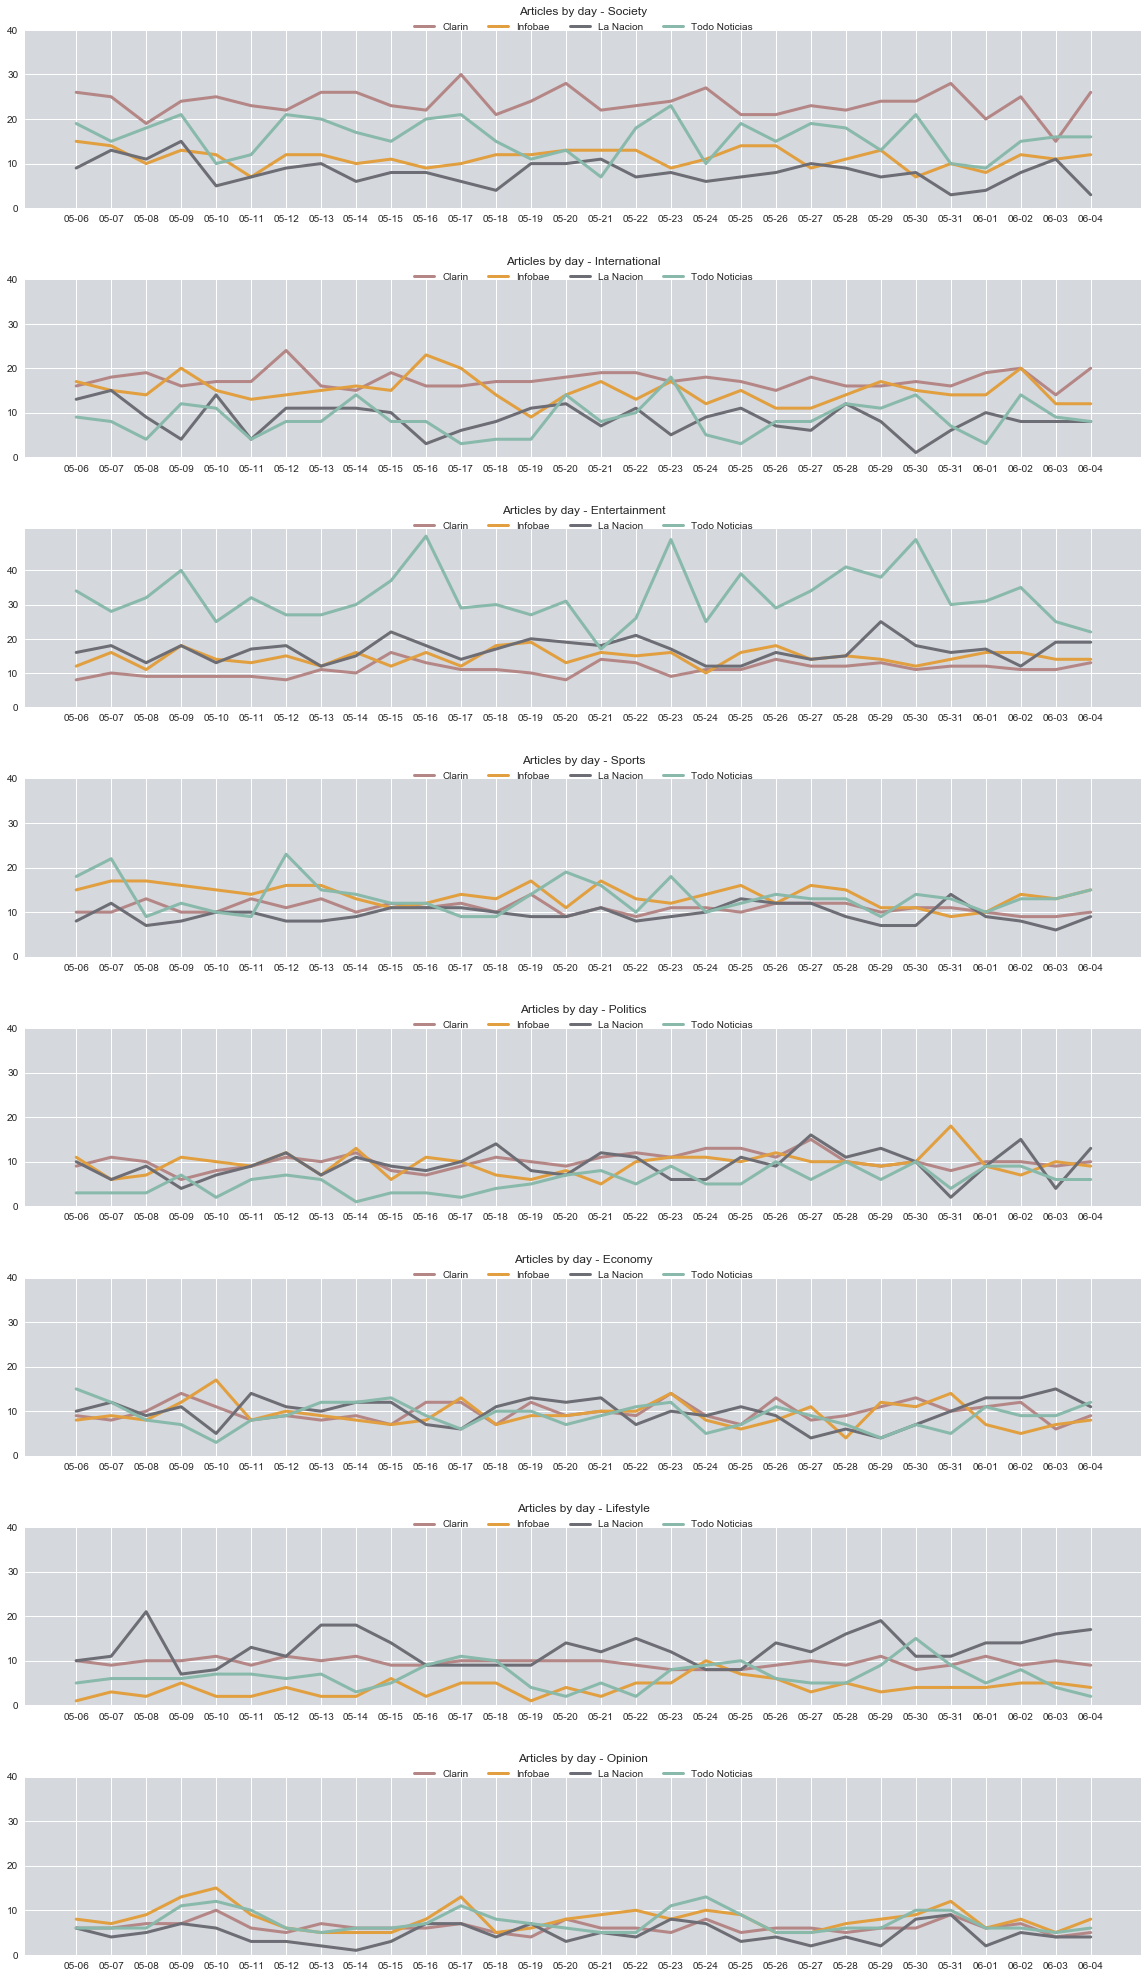

In [18]:
###APPENDIX FIGURE-A
fig = plt.figure(figsize=(20, 40))
gs = GridSpec(9, 1)

###MAIN TOPICS
max_per_day = df.groupby(["media_name", "topic", "extraction_date"]).agg({"article_name":"count"}).max().item()
main_topics = []
for name, groups in total_bymedia_bytopic.groupby("media_name"):
    for media, topic in groups.sort_values(by="topic_totals", ascending=False).iloc[0:6]["topic"].items():
        if topic not in main_topics:
            main_topics.append(topic)

####LINE PLOT TOPICS####
idx = 0
for topic in main_topics:
    df_topic =  df.groupby("topic").get_group(topic).groupby(["extraction_date", "media_name"]).agg({"article_name":"count"})
    ax = fig.add_subplot(gs[idx])
    articles_bydate1 = Plotter(df_topic.unstack(), f"Articles by day - {topic}")
    articles_bydate1.line_plotter(default_colors)
    ax.set_yticks(np.arange(0, max_per_day, 10))
    idx += 1
           
plt.subplots_adjust(hspace=0.4)
plt.show()

### <a id="appendix_b"><font color="#0F1518">Appendix - B</font></a>

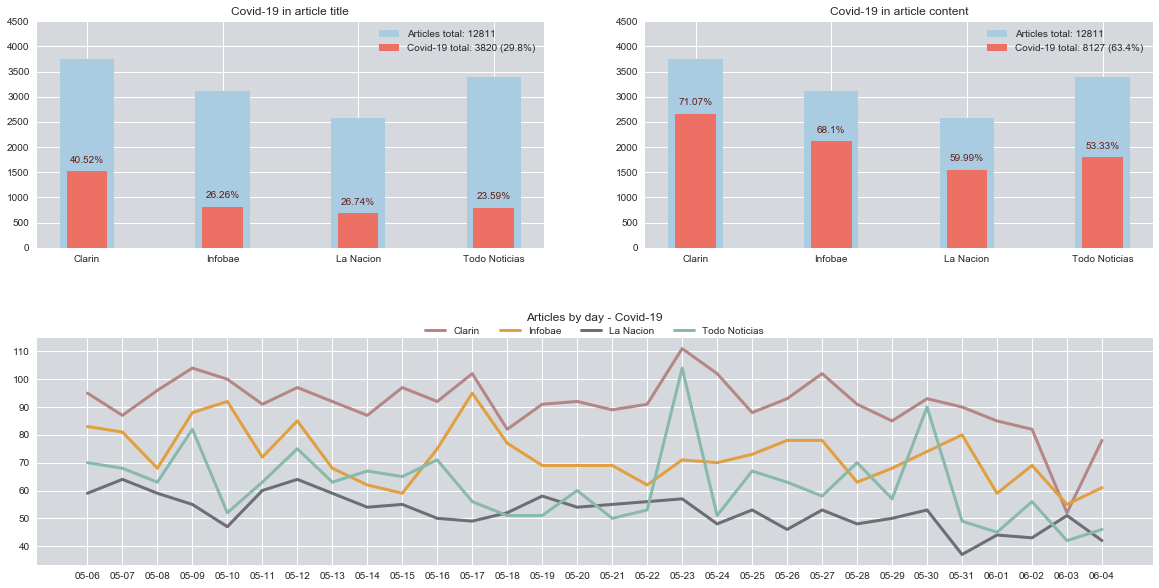

In [20]:
###APPENDIX FIGURE-B
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(2, 2)

###QUERIES
covid_intitle = df.loc[(df["article_name"].str.contains("coronavirus|cuarentena|covid"))]
covid_incontent = df.loc[df["covid_in_article"]==True]

####BAR STACKED PLOT####
idx = [0, 2, 1, 3]
titles = ["title", "content"]
idx = 0

for df_c in covid_intitle, covid_incontent:
    covid_and_total_bymedia = df.groupby("media_name")["article_name"].count(), df_c.groupby("media_name")["article_name"].count()
    ax = fig.add_subplot(gs[idx])
    corona = Plotter(covid_and_total_bymedia, f"Covid-19 in article {titles[idx]}")
    corona.bar_plotter_stack(["#A9CCE3", "#EC7063"])
    idx += 1
        
####LINE PLOT COVID####
df_covid =  df_covid_total.groupby(["extraction_date", "media_name"]).agg({"article_name":"count"})
ax = fig.add_subplot(gs[1, :2])
articles_bydate1 = Plotter(df_covid.unstack(), f"Articles by day - Covid-19")
articles_bydate1.line_plotter(default_colors)

plt.subplots_adjust(hspace=0.4)
plt.show()